# Midterm Presentation
                                                                                       Prudhvi
                                                                                       Ramteja
                                                                                       Prakash

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import seaborn as sns

In [23]:
data = pd.read_csv("https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/dataset_newsletter.csv")
data.head()

,Unnamed: 0,title,body,signature,submissiontime,category
0,0,Mrs. Laurence Class,"Because of the upcoming holiday, we will be re...",Jaslynn Laurence,11/18/15 9:26 AM,ANNOUNCEMENTS
1,1,Mr. Valle's Winter Break Packets (Cornell/Hamp...,"All my Cornell, Hampton, and Princeton student...",Mr. Sam Valle,12/16/15 9:26 PM,ANNOUNCEMENTS
2,2,Hours of Operation,"Parents/Guardians, We will gladly assist yo...",Ms. Ellis,11/18/15 3:30 PM,ANNOUNCEMENTS
3,3,Character Education,CMIT South scholars will continue to work on v...,Ch.Ed. Team Room 163,11/15/15 4:49 PM,ANNOUNCEMENTS
4,4,CMIT Students Connecting with Students Around ...,A couple of classes have had the opportunity t...,Srta. Dickerson,11/16/15 5:21 AM,ANNOUNCEMENTS


In [24]:
data.describe()

,Unnamed: 0
count,19607.0000
mean,9803.0000
std,5660.1977
min,0.0000
25%,4901.5000
50%,9803.0000
75%,14704.5000
max,19606.0000


In [25]:
data.shape

(19607, 6)

In [26]:
data.isnull().sum()

Unnamed: 0          0
title              10
body                3
signature         400
submissiontime      0
category            0
dtype: int64

In [43]:
data.dropna(subset=['signature'],inplace=True)
data.dropna(subset=['title'],inplace=True)
data.dropna(subset=['body'],inplace=True)
data.isnull().sum()

Unnamed: 0        0
title             0
body              0
signature         0
submissiontime    0
category          0
body_wordcount    0
dtype: int64

In [44]:
data.dtypes

Unnamed: 0                 int64
title                     object
body                      object
signature                 object
submissiontime    datetime64[ns]
category                  object
body_wordcount             int64
dtype: object

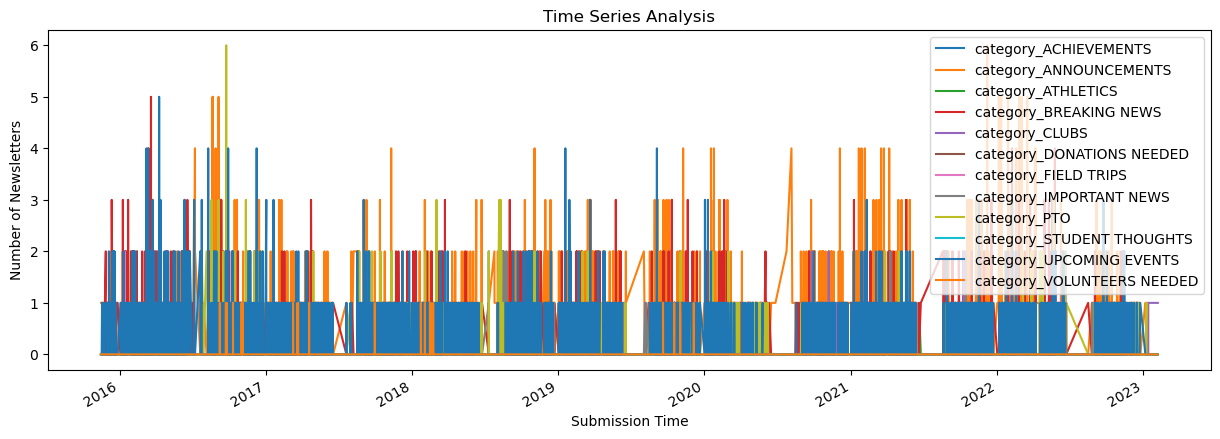

In [29]:
data['submissiontime'] = pd.to_datetime(data['submissiontime'])
df=pd.get_dummies(data,columns=["category"])
data_ts = df[['submissiontime', 'category_ACHIEVEMENTS', 'category_ANNOUNCEMENTS', 'category_ATHLETICS',
       'category_BREAKING NEWS', 'category_CLUBS', 'category_DONATIONS NEEDED',
       'category_FIELD TRIPS', 'category_IMPORTANT NEWS', 'category_PTO',
       'category_STUDENT THOUGHTS', 'category_UPCOMING EVENTS',
       'category_VOLUNTEERS NEEDED']]
data_ts = data_ts.groupby('submissiontime').sum()
data_ts.plot(figsize=(15,5))
plt.xlabel('Submission Time')
plt.ylabel('Number of Newsletters')
plt.title('Time Series Analysis')
plt.show()

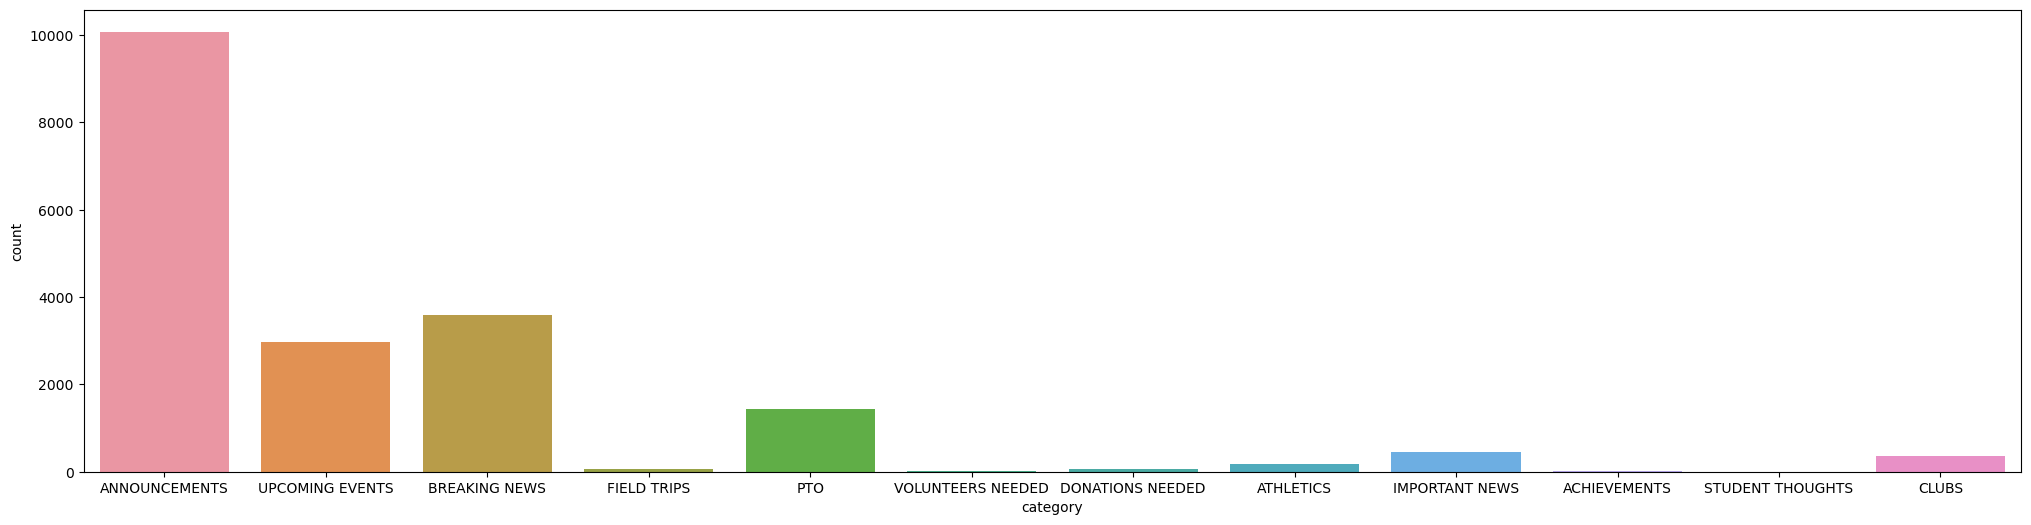

In [45]:
fig, ax = plt.subplots(figsize=(25, 6))
sns.countplot(x='category', data=data, ax=ax)
plt.show()

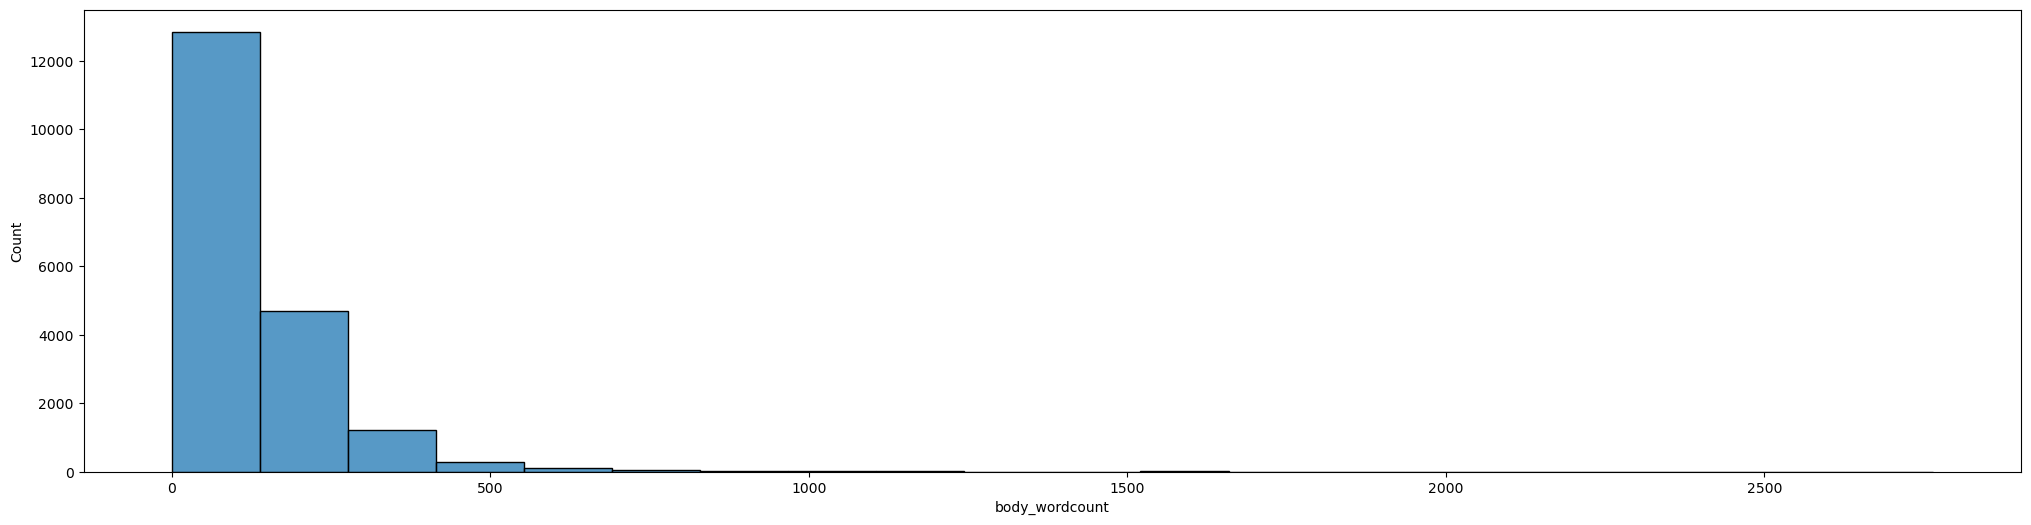

In [32]:
data['body_wordcount'] = data['body'].apply(lambda x: len(x.split()))

fig, ax = plt.subplots(figsize=(25, 6))
sns.histplot(x='body_wordcount', data=data, kde=False, bins=20, ax=ax)
plt.show()

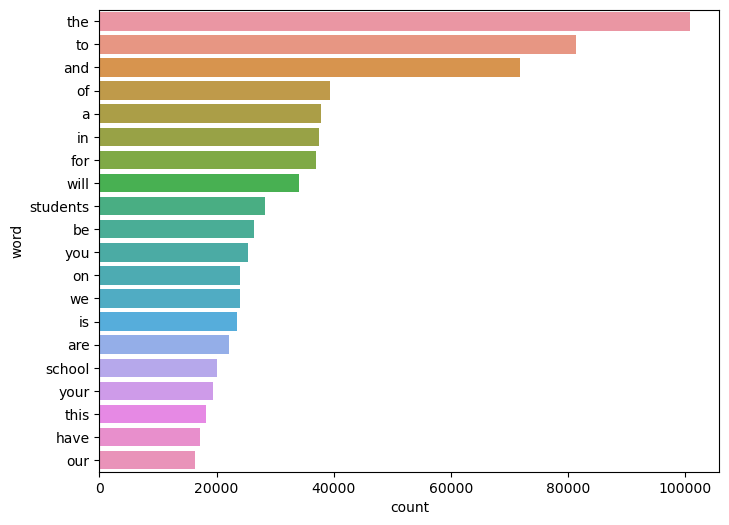

In [33]:
from collections import Counter
import re

def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text) # remove punctuation
    text = re.sub(r'\d+', '', text) # remove digits
    text = text.lower() # convert to lowercase
    return text

def get_top_n_words(text, n):
    text = preprocess_text(text)
    words = text.split()
    word_count = Counter(words)
    top_n_words = word_count.most_common(n)
    return top_n_words

top_words = get_top_n_words(' '.join(data['body']), 20)

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x='count', y='word', data=pd.DataFrame(top_words, columns=['word', 'count']), ax=ax)
plt.show()

In [46]:
X_train, X_test, y_train, y_test = train_test_split(data['body'], data['category'], test_size=0.2, random_state=3)

In [35]:
# Define a pipeline for preprocessing and model building
preprocessor = Pipeline([
    ('vect', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()),
])

In [36]:
#building a decision tree classifier
decision_tree_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('decision_tree', DecisionTreeClassifier())
])

In [37]:
#training the decision tree classifier
decision_tree_pipeline.fit(X_train, y_train)

#getting accuracy of the data on decision tree classifier
train_preds = decision_tree_pipeline.predict(X_train)
test_preds = decision_tree_pipeline.predict(X_test)

train_acc = accuracy_score(y_train, train_preds)
test_acc = accuracy_score(y_test, test_preds)

print(f"Training accuracy: {train_acc}")
print(f"Test accuracy: {test_acc}")

Training accuracy: 0.9787718955525168
Test accuracy: 0.6205729166666667


In [38]:
#building a random forest classifier
random_forest_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('random_forest', RandomForestClassifier())
])

#training the random forest classifier
random_forest_pipeline.fit(X_train, y_train)

#getting accuracy of random forest classifier on train and test data
train_preds = random_forest_pipeline.predict(X_train)
test_preds = random_forest_pipeline.predict(X_test)

train_acc = accuracy_score(y_train, train_preds)
test_acc = accuracy_score(y_test, test_preds)

print(f"Training accuracy: {train_acc}")
print(f"Test accuracy: {test_acc}")

Training accuracy: 0.9787718955525168
Test accuracy: 0.6856770833333333


In [39]:
#building a logistic regression classifier
logistic_regression_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('logistic_regression', LogisticRegression(max_iter=1000))
])

#training the logistic regression classifier
logistic_regression_pipeline.fit(X_train, y_train)

#getting accuracy of logisitic regression classifier on train and test data
train_preds = logistic_regression_pipeline.predict(X_train)
test_preds = logistic_regression_pipeline.predict(X_test)

train_acc = accuracy_score(y_train, train_preds)
test_acc = accuracy_score(y_test, test_preds)

print(f"Training accuracy: {train_acc}")
print(f"Test accuracy: {test_acc}")

Training accuracy: 0.7896724620694145
Test accuracy: 0.6794270833333333
